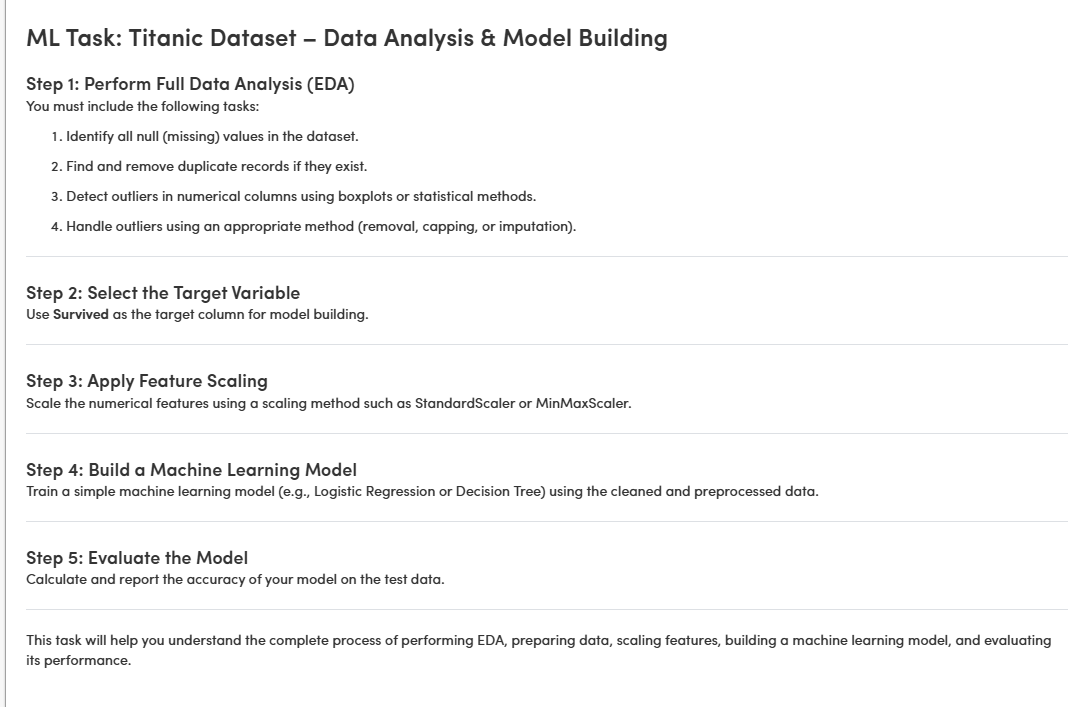

In [61]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')


### Step1: Perform Full Data Analysis (EDA)

In [62]:
df_before=pd.read_csv(r"C:\Users\akhil\ML tasks\titanic.csv")
df_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_before.shape

(891, 12)

In [64]:
df_before.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
df_before.duplicated().sum()

0

In [66]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
df_before.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
num_cols=df_before.describe().columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [69]:
cat_cols=df_before.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [70]:
# Mean and Median values calculation

for i in num_cols:
    print(f"Mean and Medain values for {i, df_before[i].mean(),df_before[i].median()}")

Mean and Medain values for ('PassengerId', 446.0, 446.0)
Mean and Medain values for ('Survived', 0.3838383838383838, 0.0)
Mean and Medain values for ('Pclass', 2.308641975308642, 3.0)
Mean and Medain values for ('Age', 29.69911764705882, 28.0)
Mean and Medain values for ('SibSp', 0.5230078563411896, 0.0)
Mean and Medain values for ('Parch', 0.38159371492704824, 0.0)
Mean and Medain values for ('Fare', 32.204207968574636, 14.4542)


In [71]:
# Skewness in numerical columns

for i in num_cols:
    print(f"skewness:{i ,df_before[i].skew()}")

skewness:('PassengerId', 0.0)
skewness:('Survived', 0.4785234382949897)
skewness:('Pclass', -0.6305479068752845)
skewness:('Age', 0.38910778230082704)
skewness:('SibSp', 3.6953517271630565)
skewness:('Parch', 2.7491170471010933)
skewness:('Fare', 4.787316519674893)


In [72]:
# Count of Missing values

for i in df_before:
    print(f"Missing values in{i, df_before[i].isnull().sum()}")

Missing values in('PassengerId', 0)
Missing values in('Survived', 0)
Missing values in('Pclass', 0)
Missing values in('Name', 0)
Missing values in('Sex', 0)
Missing values in('Age', 177)
Missing values in('SibSp', 0)
Missing values in('Parch', 0)
Missing values in('Ticket', 0)
Missing values in('Fare', 0)
Missing values in('Cabin', 687)
Missing values in('Embarked', 2)


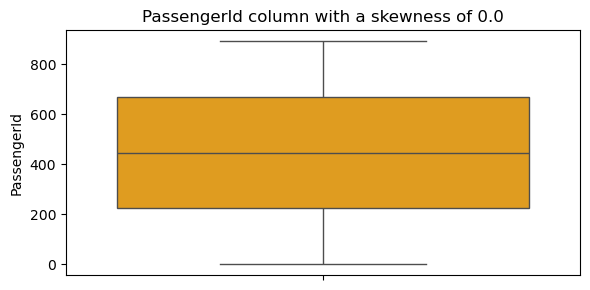

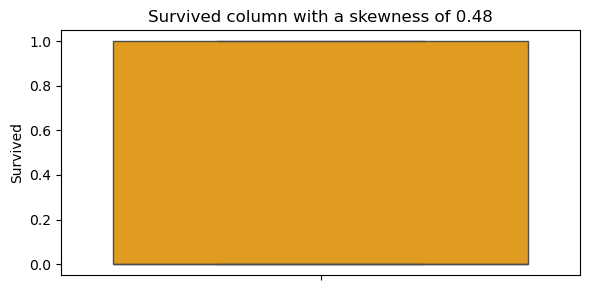

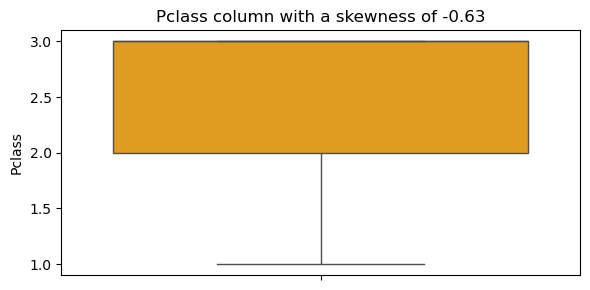

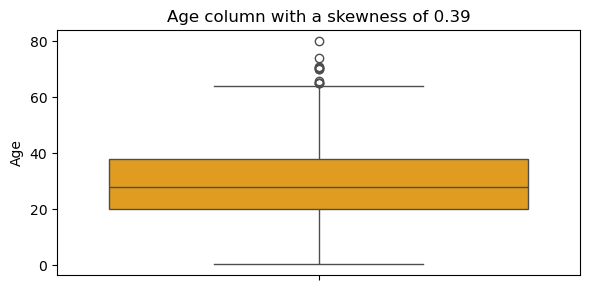

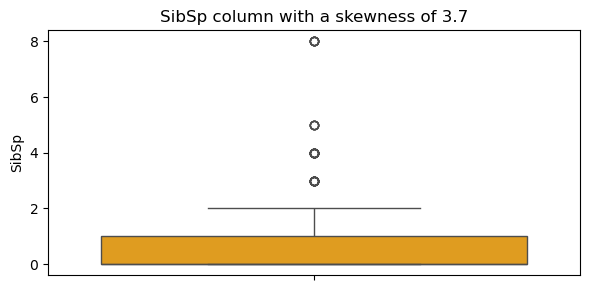

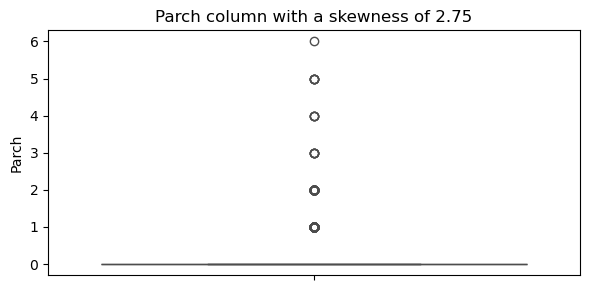

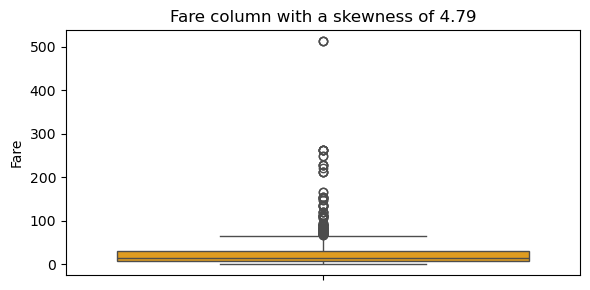

In [73]:
# outlier detection using box plot in numerical columns

for i in num_cols:
    plt.figure(figsize=(6,3))
    plt.subplot(1,1,1)
    sns.boxplot(df_before[i],color='orange')
    plt.title(f"{i} column with a skewness of {round(df_before[i].skew(),2)}")
    plt.tight_layout()
plt.show();

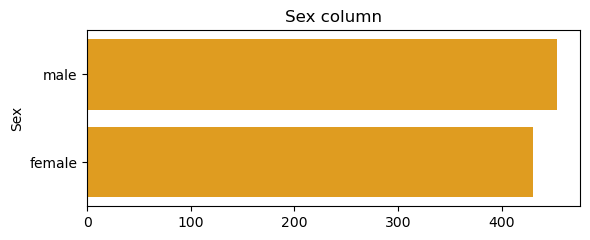

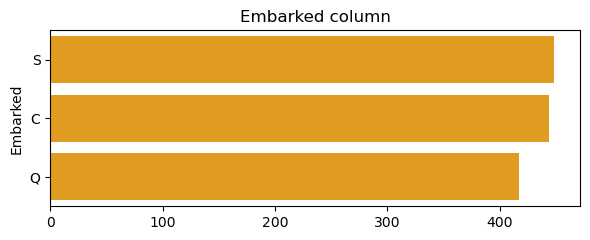

In [74]:
# rare value detection in categorical columns using bar plot


columns_to_plot=['Sex','Embarked']
for i in columns_to_plot:
    plt.figure(figsize=(6,2.5))
    plt.subplot(1,1,1)
    sns.barplot(df_before[i],ci=False,color="orange")
    plt.title(f"{i} column")
    plt.tight_layout()
plt.show();

In [75]:
df=df_before.copy()

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [78]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [79]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [80]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

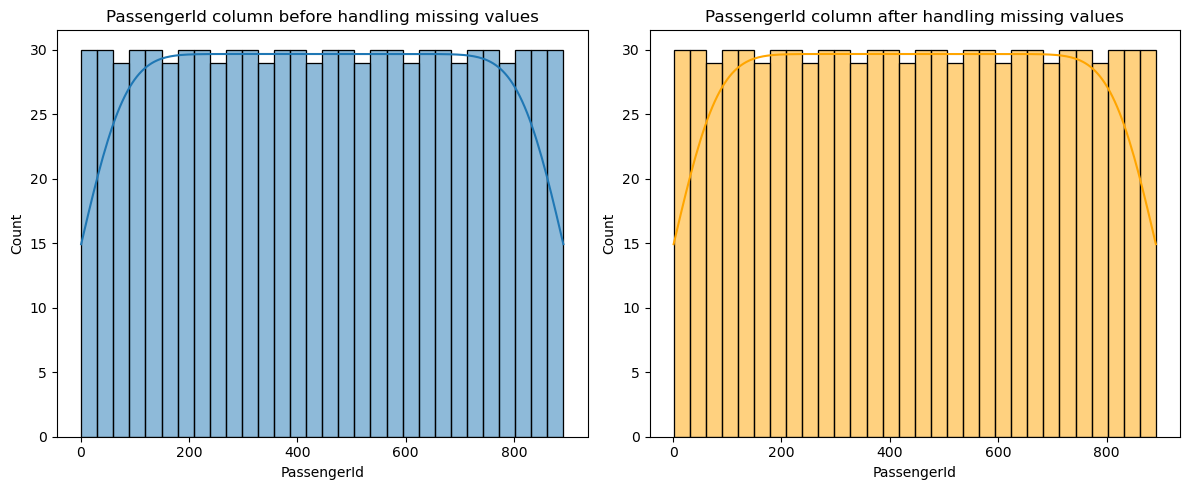

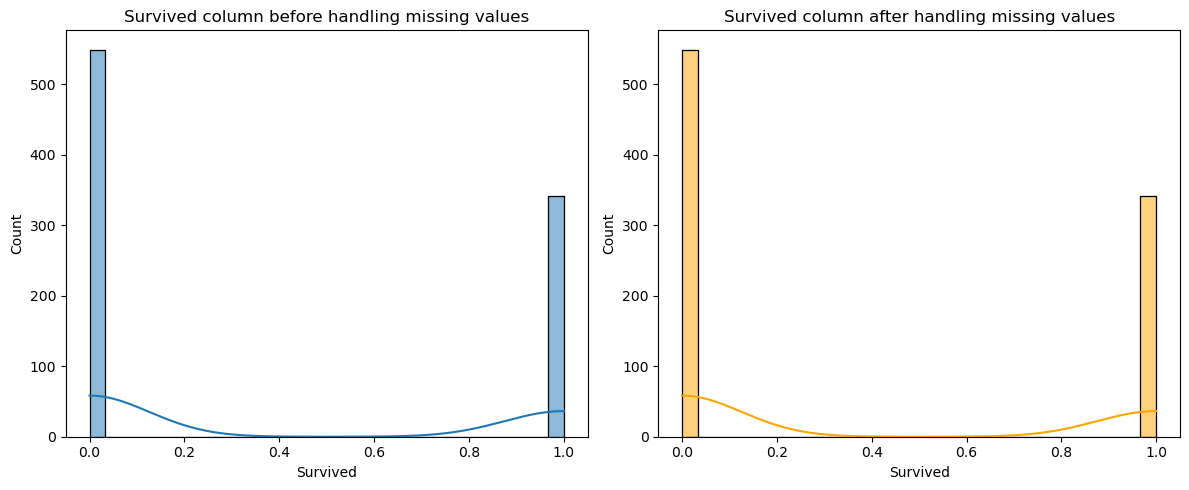

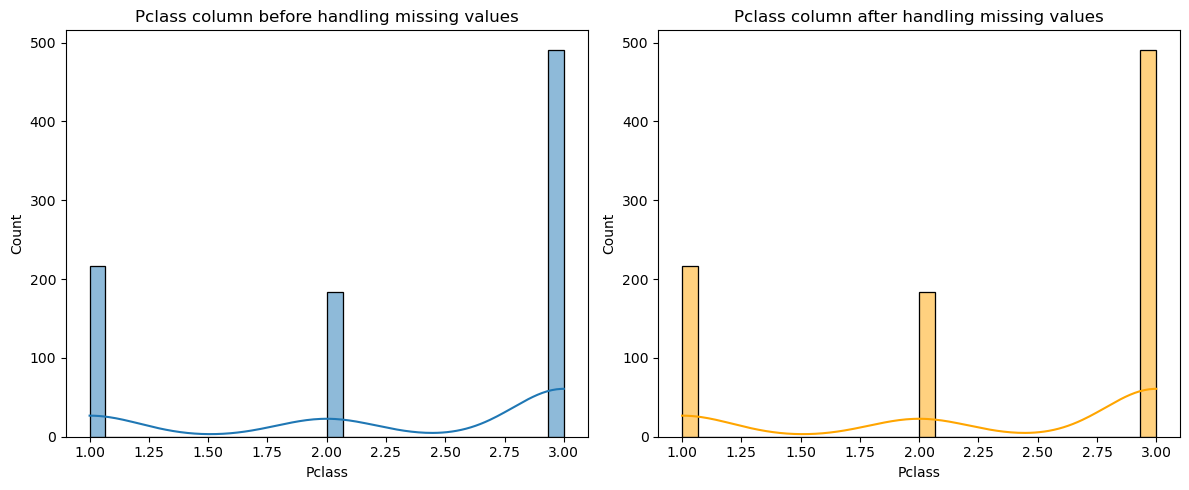

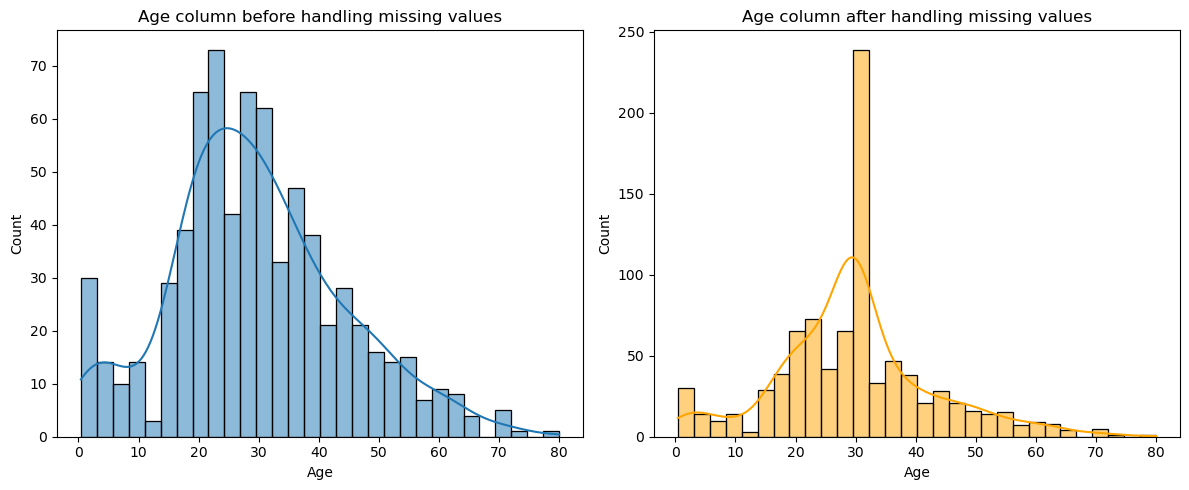

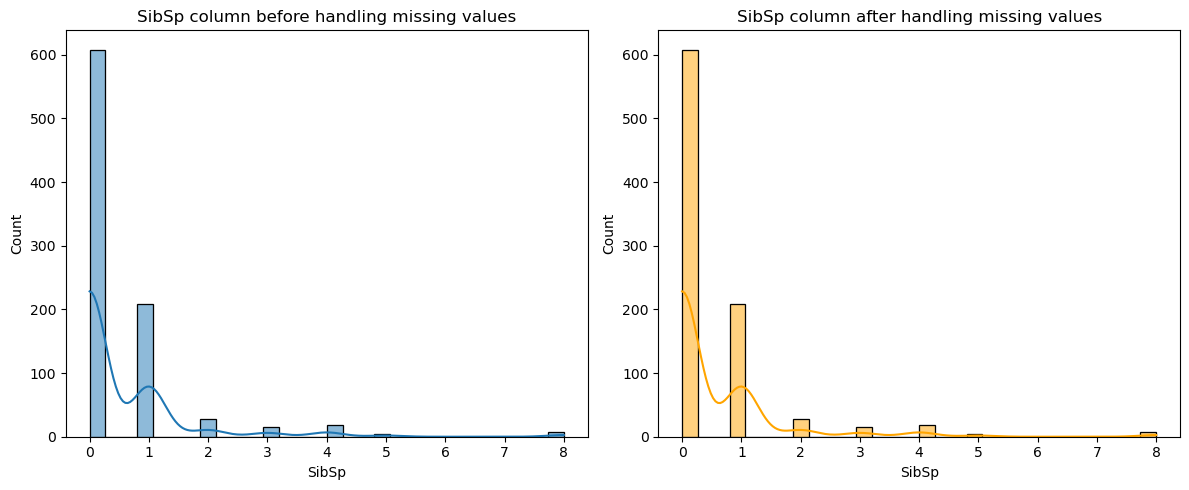

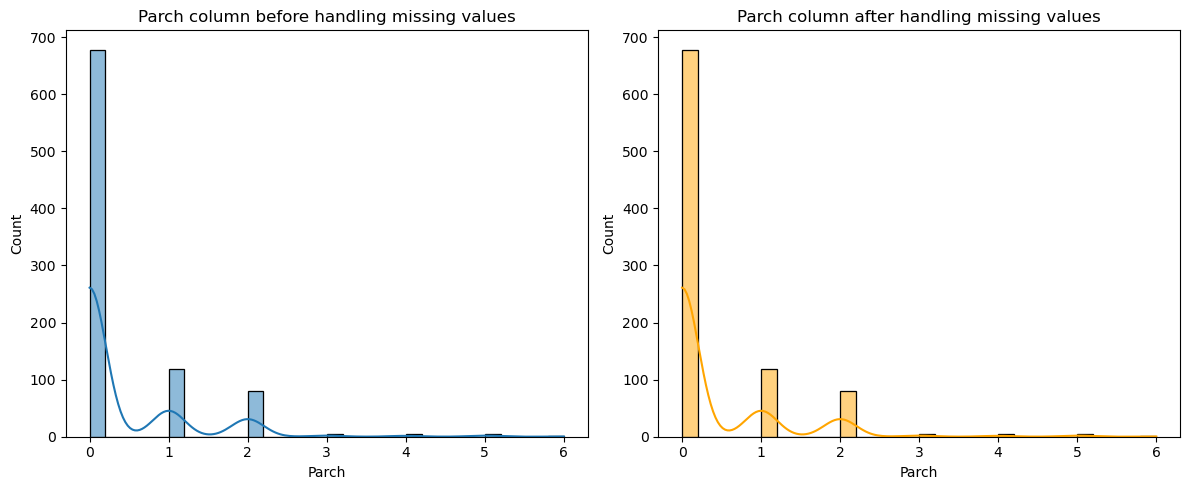

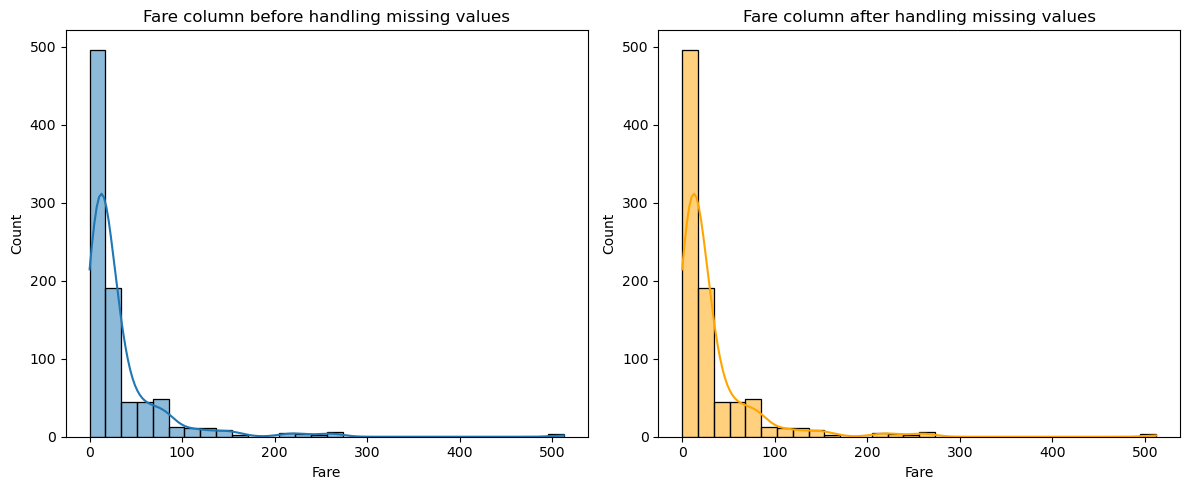

In [81]:
# outlier detection using box plot in numerical columns
# missing values imputation is done only on Age column

for i in num_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df_before[i], kde=True, bins=30)
    plt.title(f"{i} column before handling missing values")

    
    plt.subplot(1,2,2)
    sns.histplot(df[i],color='orange', kde=True, bins=30)
    plt.title(f"{i} column after handling missing values")
    plt.tight_layout()
    
plt.show();

In [82]:
for i in num_cols:
    print(f"skewness in {i} before {df_before[i].skew()}")
    print(f"skewness in {i} after {df[i].skew()}")

skewness in PassengerId before 0.0
skewness in PassengerId after 0.0
skewness in Survived before 0.4785234382949897
skewness in Survived after 0.4785234382949897
skewness in Pclass before -0.6305479068752845
skewness in Pclass after -0.6305479068752845
skewness in Age before 0.38910778230082704
skewness in Age after 0.4344880940129925
skewness in SibSp before 3.6953517271630565
skewness in SibSp after 3.6953517271630565
skewness in Parch before 2.7491170471010933
skewness in Parch after 2.7491170471010933
skewness in Fare before 4.787316519674893
skewness in Fare after 4.787316519674893


In [83]:
for i in num_cols:
    print(f"{i} {df[i].skew()}")

PassengerId 0.0
Survived 0.4785234382949897
Pclass -0.6305479068752845
Age 0.4344880940129925
SibSp 3.6953517271630565
Parch 2.7491170471010933
Fare 4.787316519674893


In [84]:
cols=['Pclass','SibSp','Parch','Fare']

In [85]:
# Capping method of handling outliers

for i in cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[cols] = np.where(df[cols] < lower_limit, lower_limit,
              np.where(df[cols] > upper_limit, upper_limit, df[cols]))


In [86]:
for i in num_cols:
    print(f"skewness in {i} before {df_before[i].skew()}")
    print(f"skewness in {i} after {df[i].skew()}")

skewness in PassengerId before 0.0
skewness in PassengerId after 0.0
skewness in Survived before 0.4785234382949897
skewness in Survived after 0.4785234382949897
skewness in Pclass before -0.6305479068752845
skewness in Pclass after -0.6305479068752845
skewness in Age before 0.38910778230082704
skewness in Age after 0.4344880940129925
skewness in SibSp before 3.6953517271630565
skewness in SibSp after 1.6211541375572365
skewness in Parch before 2.7491170471010933
skewness in Parch after 0.0
skewness in Fare before 4.787316519674893
skewness in Fare after 1.082178592000912


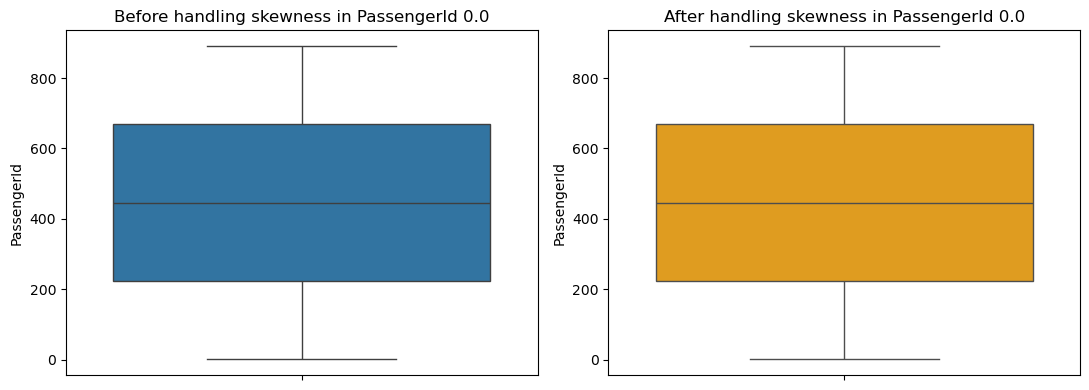

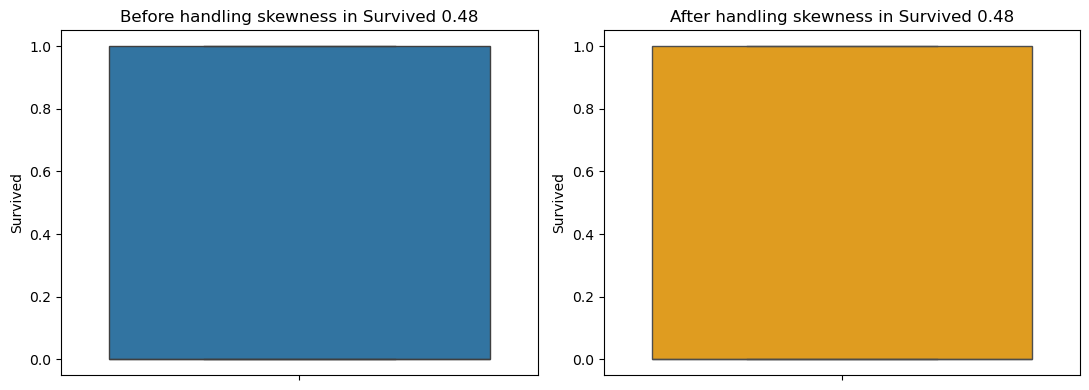

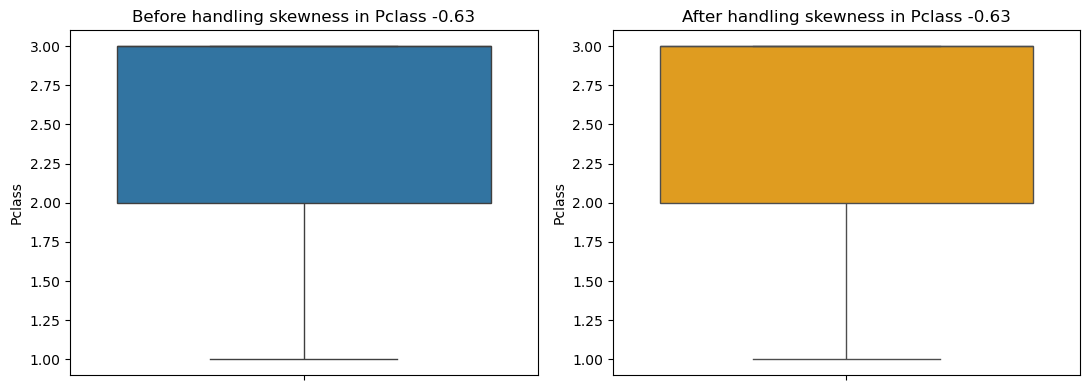

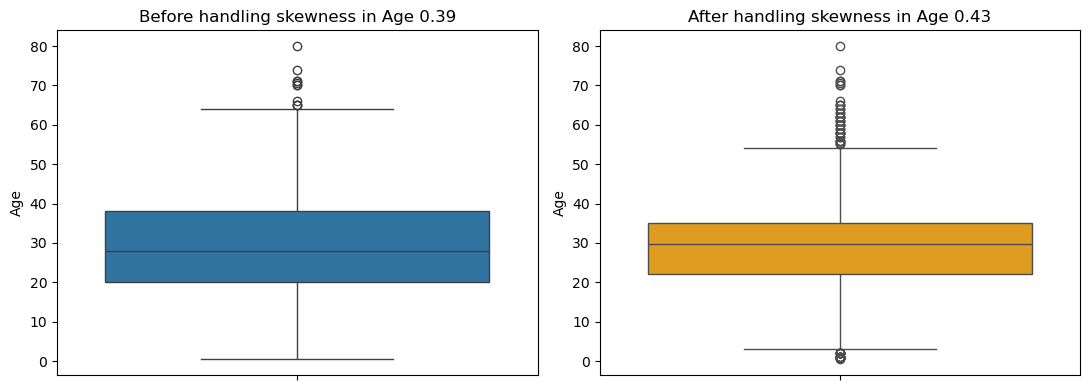

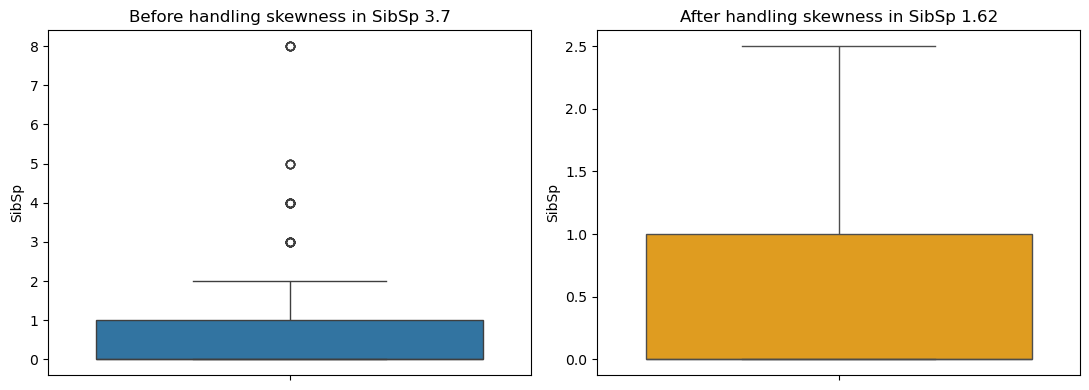

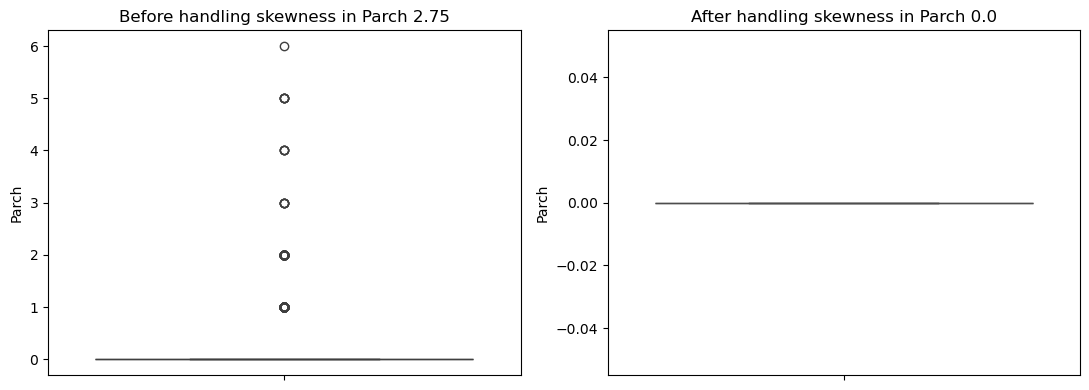

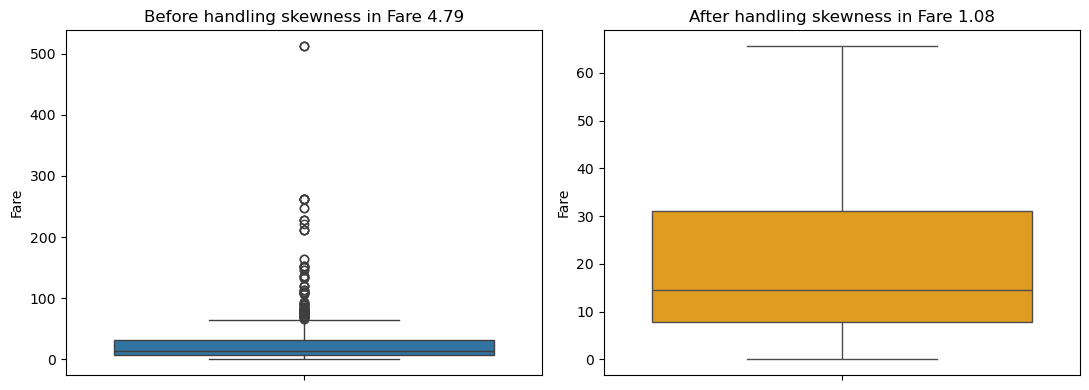

In [87]:
# outlier detection using box plot in numerical columns
# Handled outliers in cols=['Pclass','SibSp','Parch','Fare'] columns only

for i in num_cols:
    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    sns.boxplot(df_before[i])
    plt.title(f"Before handling skewness in {i} {round(df_before[i].skew(),2)}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i],color='orange')
    plt.title(f"After handling skewness in {i} {round(df[i].skew(),2)}")
    plt.tight_layout()
    
plt.show();

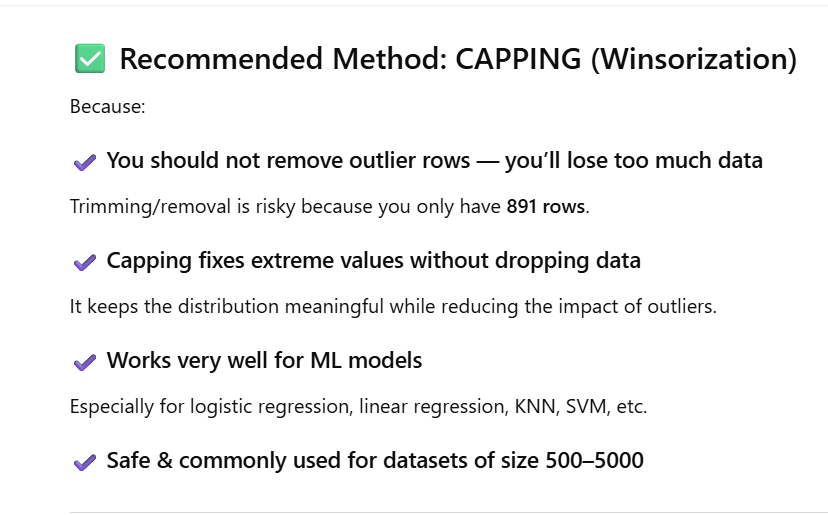
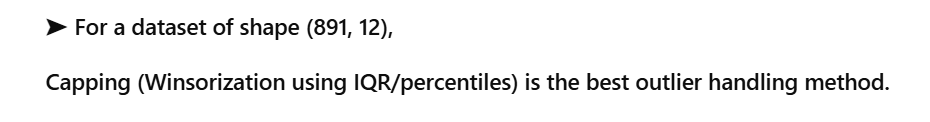

### Step2: Seggregating features and target

In [88]:
df['Survived'].unique()
df['Survived'].value_counts()

array([0, 1], dtype=int64)

Survived
0    549
1    342
Name: count, dtype: int64

In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [90]:
y=df['Survived']
y.shape

(891,)

In [91]:
x=df.drop(columns={'PassengerId','Name','Ticket','Fare','Cabin','Survived'})

In [92]:
x.shape

(891, 6)

In [93]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax

MinMaxScaler()

In [94]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3.0,male,22.000000,1.0,0.0,S
1,1.0,female,38.000000,1.0,0.0,C
2,3.0,female,26.000000,0.0,0.0,S
3,1.0,female,35.000000,1.0,0.0,S
4,3.0,male,35.000000,0.0,0.0,S
...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,S
887,1.0,female,19.000000,0.0,0.0,S
888,3.0,female,29.699118,1.0,0.0,S
889,1.0,male,26.000000,0.0,0.0,C


In [95]:
x.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [96]:
x.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [97]:
# converting categorical Columns
x.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [98]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3.0,0,22.000000,1.0,0.0,0
1,1.0,1,38.000000,1.0,0.0,1
2,3.0,1,26.000000,0.0,0.0,0
3,1.0,1,35.000000,1.0,0.0,0
4,3.0,0,35.000000,0.0,0.0,0
...,...,...,...,...,...,...
886,2.0,0,27.000000,0.0,0.0,0
887,1.0,1,19.000000,0.0,0.0,0
888,3.0,1,29.699118,1.0,0.0,0
889,1.0,0,26.000000,0.0,0.0,1


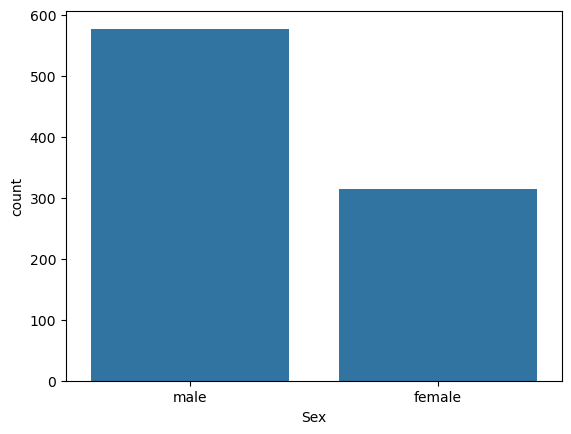

In [99]:
sns.countplot(data=df,x='Sex');

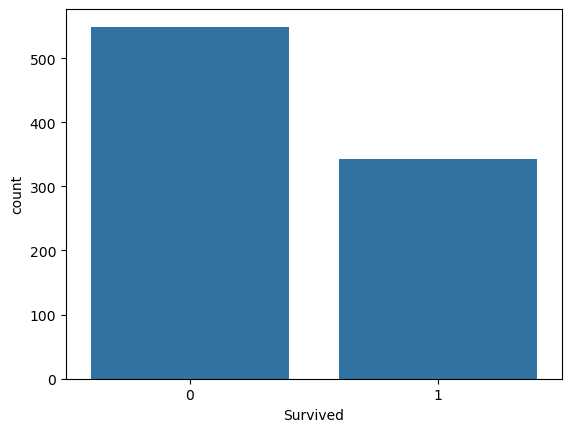

In [100]:
sns.countplot(data=df,x='Survived');

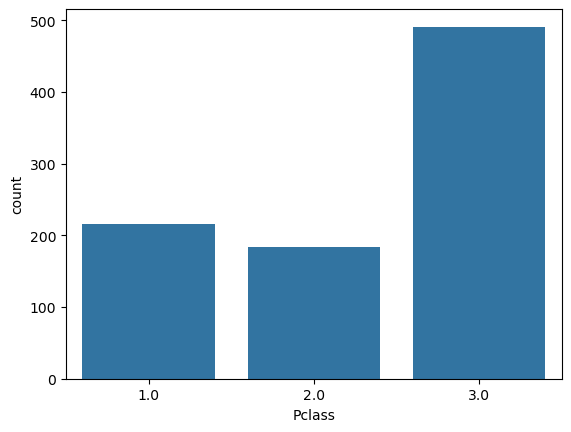

In [101]:
sns.countplot(data=df,x='Pclass');

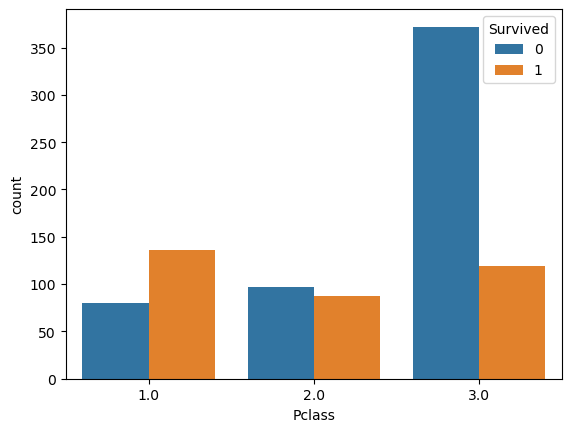

In [102]:
sns.countplot(data=df,x='Pclass',hue='Survived');

### Step3: Scaling the Features

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
minmax=MinMaxScaler().set_output(transform='pandas')
minmax

MinMaxScaler()

In [105]:
minmax_scaled_data=minmax.fit_transform(x)
minmax_scaled_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1.0,0.0,0.271174,0.4,0.0,0.0
1,0.0,1.0,0.472229,0.4,0.0,0.5
2,1.0,1.0,0.321438,0.0,0.0,0.0
3,0.0,1.0,0.434531,0.4,0.0,0.0
4,1.0,0.0,0.434531,0.0,0.0,0.0
...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.0,0.0,0.0
887,0.0,1.0,0.233476,0.0,0.0,0.0
888,1.0,1.0,0.367921,0.4,0.0,0.0
889,0.0,0.0,0.321438,0.0,0.0,0.5


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
standard_scaler=StandardScaler().set_output(transform='pandas')
standard_scaler

StandardScaler()

In [108]:
standard_scaled_data=standard_scaler.fit_transform(x)
standard_scaled_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.827377,-0.737695,-0.592481,0.810220,0.0,-0.568837
1,-1.566107,1.355574,0.638789,0.810220,0.0,1.005181
2,0.827377,1.355574,-0.284663,-0.602512,0.0,-0.568837
3,-1.566107,1.355574,0.407926,0.810220,0.0,-0.568837
4,0.827377,-0.737695,0.407926,-0.602512,0.0,-0.568837
...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.602512,0.0,-0.568837
887,-1.566107,1.355574,-0.823344,-0.602512,0.0,-0.568837
888,0.827377,1.355574,0.000000,0.810220,0.0,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.602512,0.0,1.005181


In [109]:
from sklearn.preprocessing import RobustScaler

In [110]:
robust_scaler=RobustScaler().set_output(transform='pandas')
robust_scaler

RobustScaler()

In [111]:
robust_scaled_data=robust_scaler.fit_transform(x)
robust_scaled_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,0.0,-0.592240,1.0,0.0,0.0
1,-2.0,1.0,0.638529,1.0,0.0,1.0
2,0.0,1.0,-0.284548,0.0,0.0,0.0
3,-2.0,1.0,0.407760,1.0,0.0,0.0
4,0.0,0.0,0.407760,0.0,0.0,0.0
...,...,...,...,...,...,...
886,-1.0,0.0,-0.207624,0.0,0.0,0.0
887,-2.0,1.0,-0.823009,0.0,0.0,0.0
888,0.0,1.0,0.000000,1.0,0.0,0.0
889,-2.0,0.0,-0.284548,0.0,0.0,1.0


### Step4: Building a Machine Learning Model and Evaluating using metrics(Accuracy)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [114]:
x_train_transformed=minmax.fit_transform(x_train)
x_train_transformed

,Pclass,Sex,Age,SibSp,Parch,Embarked
692,1.0,0.0,0.367921,0.0,0.0,0.0
481,0.5,0.0,0.367921,0.0,0.0,0.0
527,0.0,0.0,0.367921,0.0,0.0,0.0
855,1.0,1.0,0.220910,0.0,0.0,0.0
801,0.5,1.0,0.384267,0.4,0.0,0.0
...,...,...,...,...,...,...
359,1.0,1.0,0.367921,0.0,0.0,1.0
258,0.0,1.0,0.434531,0.0,0.0,0.5
736,1.0,1.0,0.597889,0.4,0.0,0.0
462,0.0,0.0,0.585323,0.0,0.0,0.0


#### LogisticRegression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [117]:
log_reg.fit(x_train_transformed,y_train)

LogisticRegression()

In [118]:
x_test_transformed=minmax.transform(x_test)
x_test_transformed.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
565,1.0,0.0,0.296306,0.8,0.0,0.0
160,1.0,0.0,0.547625,0.0,0.0,0.0
553,1.0,0.0,0.271174,0.0,0.0,0.5
860,1.0,0.0,0.509927,0.8,0.0,0.0
241,1.0,1.0,0.367921,0.4,0.0,1.0


In [119]:
y_predicted=log_reg.predict(x_test_transformed)
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.7932960893854749

#### DecisionTreeClassifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [124]:
dtc.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [125]:
x_test_transformed=minmax.transform(x_test)
x_test_transformed.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
565,1.0,0.0,0.296306,0.8,0.0,0.0
160,1.0,0.0,0.547625,0.0,0.0,0.0
553,1.0,0.0,0.271174,0.0,0.0,0.5
860,1.0,0.0,0.509927,0.8,0.0,0.0
241,1.0,1.0,0.367921,0.4,0.0,1.0


In [127]:
y_predicted=dtc.predict(x_test_transformed)
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test,y_predicted)

0.770949720670391

####  KNeighborsClassifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [133]:
x_train_transformed=minmax.fit_transform(x_train)
x_train_transformed.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
692,1.0,0.0,0.367921,0.0,0.0,0.0
481,0.5,0.0,0.367921,0.0,0.0,0.0
527,0.0,0.0,0.367921,0.0,0.0,0.0
855,1.0,1.0,0.220910,0.0,0.0,0.0
801,0.5,1.0,0.384267,0.4,0.0,0.0


In [134]:
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [136]:
x_test_transformed=minmax.transform(x_test)
x_test_transformed.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
565,1.0,0.0,0.296306,0.8,0.0,0.0
160,1.0,0.0,0.547625,0.0,0.0,0.0
553,1.0,0.0,0.271174,0.0,0.0,0.5
860,1.0,0.0,0.509927,0.8,0.0,0.0
241,1.0,1.0,0.367921,0.4,0.0,1.0


In [138]:
y_predicted=knn.predict(x_test_transformed)
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [139]:
accuracy_score(y_test,y_predicted)

0.7821229050279329